In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import collections

import itertools
import math
import random
import warnings
import time
warnings.filterwarnings('ignore')

In [4]:
data = [
    ["Barcelona F.C.", "La Liga", "Barcelona", "Spain", "2019", "1"],
    ["Real", "La Liga", "Madrid", "Espana", "2019", "3"],
    ["Athletico", "La Liga", "Madrid", "Spain", "2019", "2"],
#     ["Barcelona F.C.", "Barcelona", "Catalonia", "La Liga", "2018", "1"],
    ["Athletico", "Spanish_League", "Madrid", "Spain", "2018", "2"],
    ["Real", "La Liga", "Madrid", "Spain", "2018", "3"],
]

df = pd.DataFrame(data, columns=["Team", "League", "City", "Country", "Year", "Rank"])

In [5]:
df

,Team,League,City,Country,Year,Rank
0,Barcelona F.C.,La Liga,Barcelona,Spain,2019,1
1,Real,La Liga,Madrid,Espana,2019,3
2,Athletico,La Liga,Madrid,Spain,2019,2
3,Athletico,Spanish_League,Madrid,Spain,2018,2
4,Real,La Liga,Madrid,Spain,2018,3


In [75]:
constraints = [1, 2, 3]

In [76]:
def algo(df, constraints):
    df_c = df.copy()
    if 1 in constraints:
        for i, r in df_c.iterrows():
            if r.Team != "NULL" and r.City != "NULL":
                errors = df_c[(df_c.Team == r.Team) & (df_c.City != r.City) & (df_c.City != "NULL")]
                if errors.shape[0] > 0:
                    c = collections.Counter(df_c[df_c.Team == r.Team].City)
                    if "NULL" in c:
                        c.pop("NULL")
                    if len(c) > 0:
                        if c.most_common(1)[0][1] > 1:
                            df_c["City"][i] = c.most_common(1)[0][0] 

    if 2 in constraints:
        for i, r in df_c.iterrows():
            if r.League != "NULL" and r.Country != "NULL":
                errors = df_c[(df_c.League == r.League) & (df_c.Country != r.Country) & (df_c.Country != "NULL")]
                if errors.shape[0] > 0:
                    c = collections.Counter(df_c[df_c.League == r.League].Country)
                    if "NULL" in c:
                        c.pop("NULL")
                    if len(c) > 0:
                        if c.most_common(1)[0][1] > 1:
                            df_c["Country"][i] = c.most_common(1)[0][0]
                                   
                        
    if 3 in constraints:
        for i, r in df_c.iterrows():
            if r.City != "NULL" and r.Country != "NULL":
                errors = df_c[(df_c.City == r.City) & (df_c.Country != r.Country) & (df_c.Country != "NULL")]
                if errors.shape[0] > 0:
                    c = collections.Counter(df_c[df_c.City == r.City].Country)
                    if "NULL" in c:
                        c.pop("NULL")
                    if len(c) > 0:
                        if c.most_common(1)[0][1] > 1:
                            df_c["Country"][i] = c.most_common(1)[0][0]


    
    return df_c

In [77]:
algo(df, [1, 2, 3])

,Team,League,City,Country,Year,Rank
0,Barcelona F.C.,La Liga,Barcelona,Spain,2019,1
1,Real,La Liga,Madrid,Spain,2019,3
2,Athletico,La Liga,Madrid,Spain,2019,2
3,Athletico,Spanish_League,Madrid,Spain,2018,2
4,Real,La Liga,Madrid,Spain,2018,3


In [78]:
df

,Team,League,City,Country,Year,Rank
0,Barcelona F.C.,La Liga,Barcelona,Spain,2019,1
1,Real,La Liga,Madrid,Espana,2019,3
2,Athletico,La Liga,Madrid,Spain,2019,2
3,Athletico,Spanish_League,Madrid,Spain,2018,2
4,Real,La Liga,Madrid,Spain,2018,3


In [11]:
results = {}
cell = ("Country", 4)


for i in range(len(constraints) + 1):
    for comb in itertools.combinations(constraints, i):
        df_repair = algo(df, comb)
        results[comb] = df[cell[0]][cell[1]] != df_repair[cell[0]][cell[1]]
print (results)

{(): False, (1,): False, (2,): True, (3,): False, (1, 2): True, (1, 3): True, (2, 3): True, (1, 2, 3): True}


In [12]:
for i in constraints:
    shapley_value = 0
    for comb in results:
        if i not in comb:
            
            # Find comb_i             
            for comb_i in results:
                if i in comb_i and len(comb_i) == len(comb) + 1:
                    is_match = True
                    for x in comb:
                        if x not in comb_i:
                            is_match = False
                    if is_match:
                        break
            factor = math.factorial(len(comb)) * math.factorial(len(constraints) - len(comb) - 1)
            factor /= math.factorial(len(constraints))
            shapley_value += factor * (results[comb_i] - results[comb])
    print(i, shapley_value*100)

1 16.666666666666664
2 66.66666666666666
3 16.666666666666664


In [17]:
def random_combination(iterable, r):
    "Random selection from itertools.combinations(iterable, r)"
    pool = tuple(iterable)
    n = len(pool)
    indices = sorted(random.Random(time.time()).sample(range(n), r))
    return tuple(pool[i] for i in indices)

In [298]:
def naive(df, constraints):
    df_c = df.copy()
#     if 1 in constraints:
#         for i, r in df_c.iterrows():
#             if r.Team != "NULL" and r.City != "NULL":
#                 errors = df_c[(df_c.Team == r.Team) & (df_c.City != r.City) & (df_c.City != "NULL")]
#                 if errors.shape[0] > 0:
#                     c = collections.Counter(df_c[df_c.Team == r.Team].City)
#                     if "NULL" in c:
#                         c.pop("NULL")
#                     if len(c) > 0:
#                         if c.most_common(1)[0][1] > 1:
#                             df_c["City"][i] = c.most_common(1)[0][0] 

#     if 2 in constraints:
#         for i, r in df_c.iterrows():
#             if r.League != "NULL" and r.Country != "NULL":
#                 errors = df_c[(df_c.League == r.League) & (df_c.Country != r.Country) & (df_c.Country != "NULL")]
#                 if errors.shape[0] > 0:
#                     c = collections.Counter(df_c[df_c.League == r.League].Country)
#                     if "NULL" in c:
#                         c.pop("NULL")
#                     if len(c) > 0:
#                         if c.most_common(1)[0][1] > 1:
#                             df_c["Country"][i] = c.most_common(1)[0][0]
                                   
                        
    if 3 in constraints:
        for i, r in df_c.iterrows():
            if r.City != "NULL" and r.County != "NULL":
                errors = df_c[(df_c.City == r.City) & (df_c.County != r.County) & (df_c.County != "NULL")]
                if errors.shape[0] > 0:
                    c = collections.Counter(df_c[df_c.City == r.City].County)
                    if "NULL" in c:
                        c.pop("NULL")
                    if len(c) > 0:
                        if c.most_common(1)[0][1] > 1:
                            df_c["County"][i] = c.most_common(1)[0][0]


    
    return df_c

In [106]:
def naive3(df, c = []):
    df_c = df.copy()
#     print(df_c)
    for i, r in df_c.iterrows():
        if r.Sex != "NULL" and r.Relationship != "NULL":
            if r.Relationship == "Husband":
                df_c["Sex"][i] = "Male"
            elif r.Sex == "Wife":
                df_c["Sex"][i] = "Female"
    
    return df_c

In [434]:
warnings.filterwarnings('ignore')
m = 10
y = 1
# appear_freq = {}
# for e in range(y):
#     appear_freq[e]={}
#     for k in real_shap.keys():
#         appear_freq[e][k] = {}
#         appear_freq[e][k][-1] = 0
#         for i in range(m):
#             appear_freq[e][k][i] = 0

results= {}
for cell in cells:
    results[str(cell)] = 0


df = pd.read_csv('./testdata/hospital_100_2.csv')
# constraints_path = './testdata/hospital_constraints.txt'
constraints_for_alg = [1, 2, 3]
start = time.time()
# df = pd.read_csv('./testdata/La_liga2.csv')
# constraints_path = './testdata/La_liga_constraints.txt'



print(df.shape)

df_copy = df.copy()

cell_repair = (40, "County")
row_repair, col_repair = cell_repair[0], cell_repair[1]
column = cell_repair[1]

before_fix = df_copy[column][cell_repair[0]]
# df_repair = run_holoclean(df_copy, constraints_path, [column])
df_repair = naive(df_copy, [1, 2, 3])
after_fix = df_repair[column][cell_repair[0]]

print(after_fix)
print(df_copy[column][cell_repair[0]])

relevant_rows = df_repair[df_repair[column]==df_repair[column][cell_repair[0]]]
# relevant_attributes = create_constraints_file(constraints_path, [column])
relevant_attributes = ["City", "County"]
cells = list(itertools.product(relevant_rows.index, relevant_attributes))

# print(cells)
# print(len(cells))


cells.remove(cell_repair)
cells_copy = cells.copy()

memo_dict = {}
for k in range(y):
    memo_dict[k] = {}
    for cell in cells:
        memo_dict[k][str(cell)] = {"is_fix_with_cell" : {}, "is_fix_without_cell" : {}}

weights = []
params = []
    
# start = time.time()
# r = np.random.binomial(len(cells),0.5)
# p = random.uniform(0, 1)

# r = int(len(cells) * p)

N = 100 # 10000
d = 11 # 10


for k in range(y):
    # Array of what ad was selected in a particular rotation
    ads_selected = []

    num_ad_selected = np.zeros(d)
    num_ad_win = np.zeros(d)

    # Total of rewards obtained
    total_reward = 0

    # array of reward values at each rotation
    rewards = np.zeros(N)

    avg_rewards = np.zeros(d)

    # Running average of last 100 rewards
    running_avg_rewards = np.zeros(N)

    # Array for ploting number of times each ad was ran for a given rotation
    bandit_selection = np.zeros((d, N))    
    for i in range(m):

        flags_pos = 0
        eps = 1 - (i*0.01)
        if eps < 0.6:
            eps = 0.6

        if avg_rewards.sum() == 0:
            p = np.random.choice(d) / 10
        elif np.random.random() < eps:
            p = np.random.choice(d) / 10
        else:
            u = np.array(avg_rewards).argsort()[-5:][::-1]
            p = np.random.choice(u) / 10

        flag = 0
#         p = random.uniform(0, 1)
    #     print(p)
    #     p = 1.0
        r = np.random.binomial(len(cells),p)
        if 1:
            
            df_c = df.copy()
            comb = random_combination(cells, r)

            for cell in comb:
                df_c[cell[1]][cell[0]] = "NULL"

            df_repair = naive(df_c, constraints)
            is_repair_with = df_repair[col_repair][i_repair] == 'jefferson'

            df_c[col_shap][i_shap] = "NULL"

            df_repair = naive(df_c, constraints)
            is_repair_without = df_repair[col_repair][i_repair] == 'jefferson'

            a = int(is_repair_with) - int(is_repair_without)
            shap += a

            arm = int(p*10)
#             print(arm)
            ads_selected.append(arm)
            reward = flags_pos
    #         numbers_of_selections[arm] = numbers_of_selections[arm] + 1


            num_ad_selected[arm] = num_ad_selected[arm] + 1
            num_ad_win[arm] = num_ad_win[arm] + reward
            avg_rewards[arm] = num_ad_win[arm] / num_ad_selected[arm]
            total_reward = total_reward + reward


            # Update the Running average
            rewards[i] = reward
            running_avg_rewards[i] = rewards[np.arange(i-499,i+1)].mean()

            if i > 0:
                for j in range(0, d):
                    bandit_selection[j][i] = bandit_selection[j][i-1]
                bandit_selection[arm][i] = bandit_selection[arm][i-1] + 1  

end = time.time()
print("Time took for repeat {} is: ".format(m) + str(end - start))

(200, 17)
jefferson
jxffxrson


NameError: name 'col_shap' is not defined

In [208]:
results= {}
for cell in cells:
    results[str(cell)] = 0
for j in range(m):
    for cell in cells:
        try:
            if not memo_dict[e][str(cell)]["is_fix_without_cell"][j] and memo_dict[e][str(cell)]["is_fix_with_cell"][j]:
                results[str(cell)] += 1
        except:
            pass

In [210]:
results
calc_shap = {k: v/100 for k, v in sorted(results.items(), key=lambda item: -item[1])[:7]}
# print(results.values())
sum([abs(results[k]/100-real_shap[str(k)]) for k in calc_shap.keys()])

0.25199999999999995

In [212]:
{k: v/100 for k, v in sorted(results.items(), key=lambda item: -item[1])}

{"(40, 'City')": 0.6,
 "(1, 'County')": 0.15,
 "(2, 'City')": 0.15,
 "(1, 'City')": 0.13,
 "(2, 'County')": 0.08,
 "(42, 'County')": 0.04,
 "(41, 'City')": 0.02,
 "(42, 'City')": 0.02,
 "(41, 'County')": 0.01,
 "(0, 'City')": 0.0,
 "(0, 'County')": 0.0,
 "(13, 'City')": 0.0,
 "(13, 'County')": 0.0,
 "(27, 'City')": 0.0,
 "(27, 'County')": 0.0,
 "(63, 'City')": 0.0,
 "(63, 'County')": 0.0}

In [299]:
N = 100 # 10000
d = 11 # 10


# Array of what ad was selected in a particular rotation
ads_selected = []

num_ad_selected = np.zeros(d)
num_ad_win = np.zeros(d)

# Total of rewards obtained
total_reward = 0

# array of reward values at each rotation
rewards = np.zeros(N)

avg_rewards = np.zeros(d)

# Running average of last 100 rewards
running_avg_rewards = np.zeros(N)

# Array for ploting number of times each ad was ran for a given rotation
bandit_selection = np.zeros((d, N))  

In [477]:
N = 70 # 10000
d = 11 # 10

def calc_cell_shap(cell_shap, cell_repair, repeats=10, cols=None):
    i_shap, col_shap = cell_shap[0], cell_shap[1]
    i_repair, col_repair = cell_repair[0], cell_repair[1]

    cells = list(itertools.product(df.index, df.columns if cols is None else cols))
    cells.remove((i_repair, col_repair))
    cells.remove((i_shap, col_shap))
    
    shap = 0
    ads_selected = []

    num_ad_selected = np.zeros(d)
    num_ad_win = np.zeros(d)

    # Total of rewards obtained
    total_reward = 0

    # array of reward values at each rotation
    rewards = np.zeros(N)

    avg_rewards = np.zeros(d)

    # Running average of last 100 rewards
    running_avg_rewards = np.zeros(N)

    # Array for ploting number of times each ad was ran for a given rotation
    bandit_selection = np.zeros((d, N))    
    for i in range(repeats):

        flags_pos = 0
        eps = 1 - (i*0.01)
        if eps < 0.6:
            eps = 0.6

        if avg_rewards.sum() == 0:
            p = np.random.choice(d) / 10
        elif np.random.random() < eps:
            p = np.random.choice(d) / 10
        else:
            u = np.array(avg_rewards).argsort()[-5:][::-1]
            p = np.random.choice(u) / 10

        flag = 0
        r = np.random.binomial(len(cells),p)
            
        df_c = df.copy()
        comb = random_combination(cells, r)

        for cell in comb:
            df_c[cell[1]][cell[0]] = "NULL"

        df_repair = naive(df_c, constraints)
        is_repair_with = df_repair[col_repair][i_repair] == 'jefferson'

        df_c[col_shap][i_shap] = "NULL"

        df_repair = naive(df_c, constraints)
        is_repair_without = df_repair[col_repair][i_repair] == 'jefferson'

        a = int(is_repair_with) - int(is_repair_without)
        shap += a
        reward = a

        arm = int(p*10)
#         print(arm)
        ads_selected.append(arm)


        num_ad_selected[arm] = num_ad_selected[arm] + 1
        num_ad_win[arm] = num_ad_win[arm] + reward
        avg_rewards[arm] = num_ad_win[arm] / num_ad_selected[arm]
        total_reward = total_reward + reward


        # Update the Running average
        rewards[i] = reward
#         print(rewards)
#     print("AVG")
#     print(avg_rewards)

    
    return shap 

In [478]:
df = pd.read_csv('./testdata/hospital_300.csv')
# constraints_path = './testdata/hospital_constraints.txt'

cols = list(df.columns)
# cols.remove("Rank")
# cols.remove("Year")

In [479]:
# time.time() - start

In [480]:
# cells = list(itertools.product(df.index, df.columns))
cell_repair = (40, "County")
column = cell_repair[1]
# cells.remove(cell_repair)
df_copy = df.copy()
df_repair = naive(df_copy, [1,2,3])

relevant_rows = df_repair[df_repair[column]==df_repair[column][cell_repair[0]]]
relevant_attributes = ["City", "County"]

cells = list(itertools.product(relevant_rows.index, relevant_attributes))


cells.remove(cell_repair)

# cells = [(42, 'City'), (42, 'County')]
# print(cells)


results = {}
start = time.time()
for cell in cells:
    results[cell] = calc_cell_shap(cell, cell_repair, repeats=70, cols=cols)
print(time.time() - start)

3000.5879497528076


In [481]:
rewards
# results
# cells

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [430]:
# results
calc_shap = {k: v/70 for k, v in sorted(results.items(), key=lambda item: -item[1])[:20]}
# print(results.values())
sum([abs(results[k]/70-real_shap[str(k)]) for k in calc_shap.keys()])

KeyError: "(141, 'City')"

In [431]:
{k: v/70 for k, v in sorted(results.items(), key=lambda item: -item[1])}

{(40, 'City'): 0.52,
 (1, 'City'): 0.06,
 (141, 'City'): 0.04,
 (142, 'City'): 0.04,
 (241, 'City'): 0.04,
 (242, 'City'): 0.04,
 (2, 'City'): 0.02,
 (41, 'County'): 0.02,
 (101, 'County'): 0.02,
 (102, 'County'): 0.02,
 (141, 'County'): 0.02,
 (142, 'County'): 0.02,
 (201, 'County'): 0.02,
 (202, 'City'): 0.02,
 (241, 'County'): 0.02,
 (0, 'City'): 0.0,
 (0, 'County'): 0.0,
 (1, 'County'): 0.0,
 (2, 'County'): 0.0,
 (13, 'City'): 0.0,
 (13, 'County'): 0.0,
 (27, 'City'): 0.0,
 (27, 'County'): 0.0,
 (41, 'City'): 0.0,
 (42, 'City'): 0.0,
 (42, 'County'): 0.0,
 (63, 'City'): 0.0,
 (63, 'County'): 0.0,
 (100, 'City'): 0.0,
 (100, 'County'): 0.0,
 (101, 'City'): 0.0,
 (102, 'City'): 0.0,
 (113, 'City'): 0.0,
 (113, 'County'): 0.0,
 (127, 'City'): 0.0,
 (127, 'County'): 0.0,
 (140, 'County'): 0.0,
 (163, 'City'): 0.0,
 (163, 'County'): 0.0,
 (200, 'City'): 0.0,
 (200, 'County'): 0.0,
 (201, 'City'): 0.0,
 (202, 'County'): 0.0,
 (213, 'City'): 0.0,
 (213, 'County'): 0.0,
 (227, 'City'): 0.0

In [127]:
real_shap = {
 "(40, 'City')": 0.538,
 "(1, 'County')": 0.09,
 "(1, 'City')": 0.09,
 "(2, 'County')": 0.09,
 "(2, 'City')": 0.09,
 "(41, 'County')": 0.026,
 "(41, 'City')": 0.026,
 "(42, 'County')": 0.026,
 "(42, 'City')": 0.026,
}

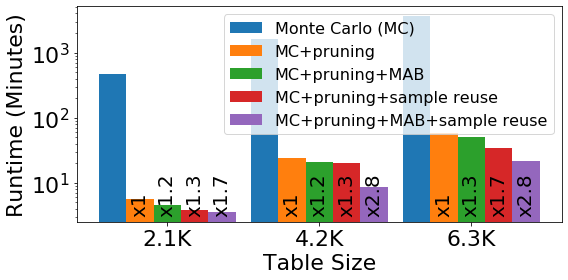

In [23]:
import numpy as np
labels = ["2.1K", "4.2K", "6.3K"]
Monte = [28280/60 ,97230/60, 218190/60]
MC_prune = [340/60 ,1455/60 ,3556/60]
MC_prune_pick_p = [270/60, 1264/60, 3001/60]
MC_prune_reuse = [230/60, 1214/60, 2041/60]
All_Opt = [214/60, 518/60, 1288/60]

x = np.arange(len(labels))  # the label locations
width = 0.18  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x - 2* width, Monte, width, label='Monte Carlo (MC)')
rects2 = ax.bar(x - width, MC_prune, width, label='MC+pruning')
rects3 = ax.bar(x, MC_prune_pick_p, width, label='MC+pruning+MAB')
rects4 = ax.bar(x + width, MC_prune_reuse, width, label='MC+pruning+sample reuse')
rects5 = ax.bar(x + 2* width, All_Opt, width, label='MC+pruning+MAB+sample reuse')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
plt.yscale("log")
plt.xlabel('Table Size', size=22)
ax.set_ylabel('Runtime (Minutes)', size=22)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 16})
ax.tick_params(axis='y', which='major', labelsize=22)
ax.tick_params(axis='x', which='major', labelsize=22)

j = 0
h = [1, 1, 1]
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, 3.5, 'x{}'.format(h[j]), ha='center', rotation=90, size=20)
    j += 1

j = 0
h = [1.2, 1.2, 1.3]
for rect in rects3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, 3.5, 'x{}'.format(h[j]), ha='center', rotation=90, size=20)
    j += 1

    
j = 0
h = [1.3, 1.3, 1.7]
for rect in rects4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, 3.5, 'x{}'.format(h[j]), ha='center', rotation=90, size=20)
    j += 1
    
    
j = 0
h = [1.7, 2.8, 2.8]
for rect in rects5:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, 3.5, 'x{}'.format(h[j]), ha='center', rotation=90, size=20)
    j += 1
    
    
fig.tight_layout()
# plt.figure(figsize=(70,10))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

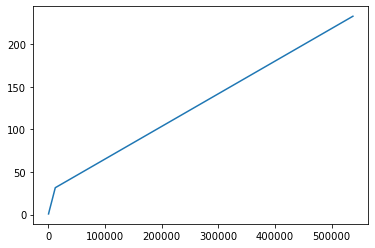

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([220, 2000, 5500, 12100, 537262], [0.7, 5.5, 14.4, 31.5, 233], label='Slovenian')
plt.plot([220, 2000, 5500, 12100], [43.5, 1465, 10535], label='random')
plt.xlabel('Cells in Table')
plt.ylabel('Running Time')
plt.legend()
plt.show()

In [36]:
print(time.time() - start)

2009.6521964073181


In [38]:
time.time()

1600614627.1170356

In [39]:
print(time.time() - start)

2027.947919845581
